# Morphological Analysis    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bcd.explore.meta.case import CaseExplorer

INFO:bcd.explore.meta.case:mass_shape      ARCHITECTURAL_DISTORTIONARCHITECTURAL_DISTORTI...
mass_margins    ILL_DEFINEDOBSCUREDSPICULATEDILL_DEFINEDMICROL...
cancer                                                       1.00
dtype: object


<Axes: title={'center': 'Probability of Malignancy of Mass Shape by Mass Margins.'}, xlabel='mass_margins', ylabel='mass_shape'>

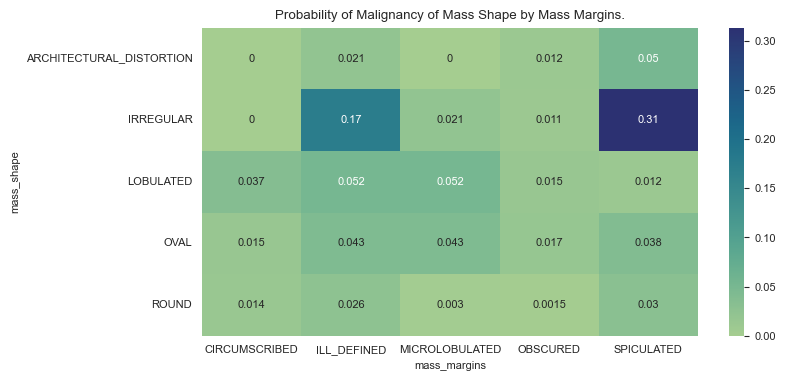

In [4]:
FP = "data/meta/3_cooked/cases.csv"
x = CaseExplorer(filepath=FP)
x.morphology_analysis(a='mass_shape', b='mass_margins')

In [ ]:
df = pd.read_csv(FP)

In [ ]:
df = df.loc[df['mass_shape'].isin(['IRREGULAR', 'OVAL', 'LOBULATED', 'ROUND', 'ARCHITECTURAL_DISTORTION'])]
df = df.loc[df['mass_margins'].isin(['SPICULATED', 'CIRCUMSCRIBED', 'ILL_DEFINED', 'OBSCURED', 'MICROLOBULATED'])]
x = df.groupby(by=['mass_shape', 'mass_margins'])['cancer'].sum()
x = x / df.groupby(by=['mass_shape'])['cancer'].sum()
x = x.to_frame().reset_index()
x = x.pivot(index='mass_shape', columns='mass_margins', values='cancer').fillna(0)
sns.heatmap(x, cmap='crest', annot=True) 
plt.show() 